# Assignment 2 - Individual Checkpoint 2

## Overview (Top Matter)

Group ID: CC07-G01

Driving Problem: Do they get at least 30 minutes of moderate activity on most days of the week?

Link to [Personal Planning and Progress Github wiki page](https://github.sydney.edu.au/yoli6991/2024-DATA3406-CC07-Group01/wiki/Personal-Planning-and-Progress-%E2%80%90-Kylie-Haryono).

List of database IDs explored: 
- 1644430081
- 2022484408
- 4558609924

ID of person for Checkpoint 2: 4558609924

Why I chose this ID: Out of the three IDs that I explored in the first checkpoint, this was the ID with the median number of low-count days. I would assume that this would be a little more on the average, with 2022484408 being more active and 1644430081 being a little less active.

## Help Statement
For coding, I used the help of stackoverflow for writing code and GAI for debugging. I also used GAI in the visualisation, mainly in customising the bar graph. An online resource used is an article that specifies on how many steps is counted as moderate activity (references at the bottom).

## Initial assumptions & Predictions

I assume that the ID 4558609924 does not take off their watch during the period their data was recorded. This is because the data shows consistent activity throughout the day without long periods of zero step counts, except during ngihttime, which is expected due to sleep time.

Another assumption that was made was that moderate exercise is at least 100 steps/minute. This is taken from a study by Tudor-Locke et al (2011).

Considering the basis of which I picked the ID, I predict that they would meet the 30 minutes-of-moderate-activity-a-day requirement most of the time, perhaps 70%-80%. This is because they are not too active but not very inactive either, which provides a (predicted) balance.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
min_df = pd.read_csv("C:\\Users\\kylie\\Downloads\\minuteStepsWide_merged.csv")
min_df = min_df[min_df['Id'] == 4558609924]

# new col to count how many minutes exceed 100 steps
min_df['over_100_mins'] = 0

# iterating over each row to count the number of minutes exceeding 100 steps
for index, row in min_df.iterrows():
    count = sum(row[col] > 100 for col in min_df.columns if 'Steps' in col)
    min_df.at[index, 'over_100_mins'] = count  # Update the new column with the count

                ActivityHour  over_100_mins
10992  4/13/2016 12:00:00 AM              0
10993   4/13/2016 1:00:00 AM              0
10994   4/13/2016 2:00:00 AM              0
10995   4/13/2016 3:00:00 AM              0
10996   4/13/2016 4:00:00 AM              0
...                      ...            ...
11704   5/12/2016 4:00:00 PM              0
11705   5/12/2016 5:00:00 PM              0
11706   5/12/2016 6:00:00 PM              0
11707   5/12/2016 7:00:00 PM              0
11708   5/12/2016 8:00:00 PM              0

[717 rows x 2 columns]


In [5]:
# new col to extract the first word from 'ActivityHour' (date)
# this is bc I had trouble with typeerror
min_df['Date'] = min_df['ActivityHour'].str.split().str[0]

# group by the 'Date' column and sum the 'over_100_mins'
grouped_df = min_df.groupby('Date', as_index=False)['over_100_mins'].sum()

# grouped df
print(grouped_df)

         Date  over_100_mins
0   4/13/2016             11
1   4/14/2016              0
2   4/15/2016              1
3   4/16/2016             11
4   4/17/2016             11
5   4/18/2016             20
6   4/19/2016              0
7   4/20/2016              1
8   4/21/2016             12
9   4/22/2016             24
10  4/23/2016              4
11  4/24/2016              0
12  4/25/2016              0
13  4/26/2016              9
14  4/27/2016             35
15  4/28/2016              0
16  4/29/2016             24
17  4/30/2016             17
18   5/1/2016              0
19  5/10/2016              8
20  5/11/2016              3
21  5/12/2016              0
22   5/2/2016              0
23   5/3/2016              0
24   5/4/2016              2
25   5/5/2016             15
26   5/6/2016              0
27   5/7/2016             28
28   5/8/2016              7
29   5/9/2016             12


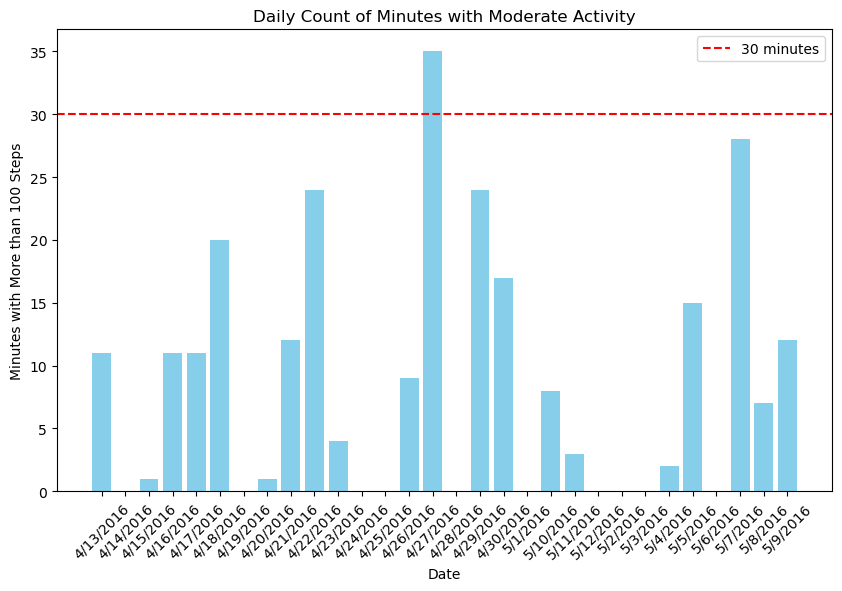

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Date'], grouped_df['over_100_mins'], color='skyblue')
plt.axhline(y=30, color='r', linestyle='--', label='30 minutes')
plt.title('Daily Count of Minutes with Moderate Activity')
plt.xlabel('Date')
plt.ylabel('Minutes with More than 100 Steps')
plt.xticks(rotation=45)
plt.legend()
plt.show()

After the visualisation, it can be seen that the prediction was wrong. The ID only had one day that exceeded the suggested exercise levels.

---

## References

Tudor-Locke, C., Craig, C.L., Brown, W.J. et al. How many steps/day are enough? for adults. Int J Behav Nutr Phys Act 8, 79 (2011). https://doi.org/10.1186/1479-5868-8-79